# Práctica de balanceo de datos

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

from collections import Counter # Para contar los valores de una lista o array 
sns.set_palette(['#55a3cd', '#9c2f45'])
#sns.palplot(sns.color_palette())

# Creación del dataset de ejemplo

In [18]:
X, Y = make_classification(n_samples=20000, n_features=2, n_informative=2, # 2 características informativas 
                            n_redundant=0, n_repeated=0, n_classes=2, # 2 clases (0 y 1) 
                            n_clusters_per_class=1, # 1 cluster por clase 
                            weights=[0.95, 0.05], # 95% de los datos son de la clase 0 y 5% de la clase 1
                            class_sep=0.9, random_state=100) # separación entre clases (0.8) y semilla aleatoria (100)


# Creación del dataframe

In [19]:
X1, X2 = list(), list() 
for i, j in enumerate(X): # itera sobre cada elemento de X y su índice i
    X1.append(j[0])
    X2.append(j[1])

df = pd.DataFrame({'X1':X1, 'X2':X2, 'Y':Y}) # crea un dataframe con las columnas X1, X2 y Y 

In [20]:
df

,X1,X2,Y
0,-1.111387,1.156458,0
1,-0.507372,0.393590,0
2,-0.811679,0.679483,0
3,-1.664781,0.232817,0
4,-0.070419,1.028523,0
...,...,...,...
19995,-1.413497,-0.034881,0
19996,-3.258555,-0.741384,0
19997,-0.360103,1.526825,0
19998,-1.410686,0.977995,0


# Inspección visual de las clases

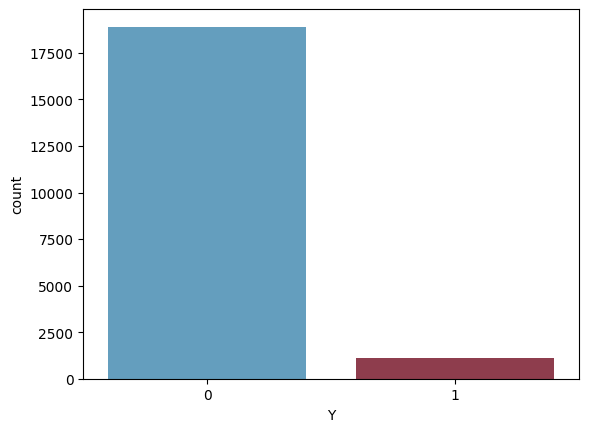

In [21]:
#crear un countplot de Y
sns.countplot(x='Y', data=df)
plt.show()

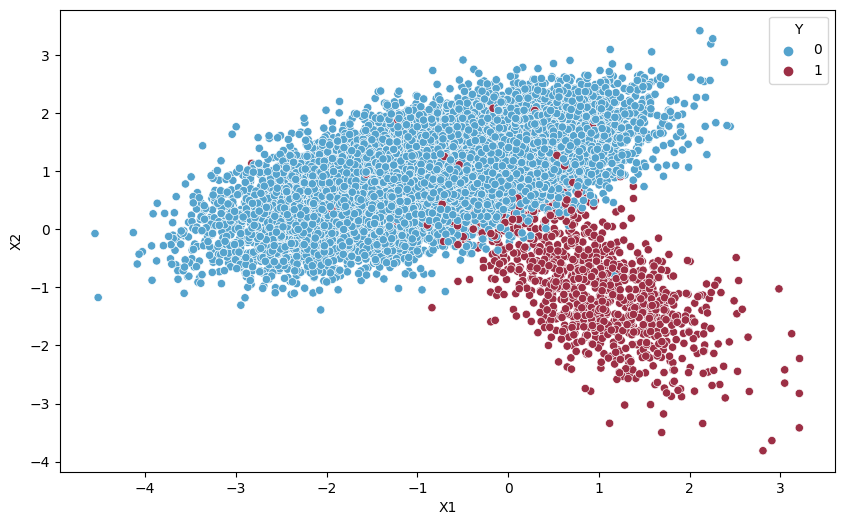

In [22]:
# Datos no balanceados
plt.figure(figsize=(10,6),dpi=100)
sns.despine(left=True)
sns.scatterplot(data=df,x='X1', y='X2', hue = 'Y')
plt.show()

In [7]:
df['Y'].value_counts()

0    18909
1     1091
Name: Y, dtype: int64

In [8]:
x = df.drop('Y', axis=1) #x1,X2
y = df['Y'] #Y

## Resampling Techniques: SMOTE, ADASYN, SMOTE + Tomek Links, SMOTE + ENN

In [ ]:
#pip install imblearn

### SMOTE
Genera muestras sintéticas de la clase minoritaria

In [9]:
from imblearn.over_sampling import SMOTE
#pip install imblearn

counter = Counter(y) # y es la variable objetivo (target) del dataset de entrenamiento
print('Antes',counter)
# oversampling el datased de entrenamiento usando SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train1, y_train1 = smt.fit_resample(x, y)

counter = Counter(y_train1)
print('Después',counter)

Antes Counter({0: 18909, 1: 1091})
Después Counter({0: 18909, 1: 18909})


In [10]:
df_sm = X_train1.copy()
df_sm['Y'] = y_train1

### ADASYN
El funcionamiento de ADASYN es similar al de SMOTE, pero en lugar de generar muestras sintéticas de forma aleatoria, se generan de forma más inteligente. En concreto, se generan muestras en las regiones de la clase minoritaria que son más difíciles de aprender, es decir, aquellas que se encuentran más cerca de la frontera de decisión. Para ello, se utiliza el algoritmo de K-vecinos más cercanos (KNN) para determinar qué muestras son más difíciles de aprender y, por tanto, necesitan ser generadas. En la siguiente figura se puede ver un ejemplo de cómo funciona ADASYN.

In [11]:
from imblearn.over_sampling import ADASYN

counter = Counter(y)
print('Antes',counter)
# oversampling el datased de entrenamiento usando SMOTE
ada = ADASYN()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train1, y_train1 = ada.fit_resample(x, y)

counter = Counter(y_train1)
print('Después',counter)

Antes Counter({0: 18909, 1: 1091})
Después Counter({1: 18966, 0: 18909})


In [12]:
df_ada = X_train1.copy()
df_ada['Y'] = y_train1

### SMOTETomek

Su objetivo es combinar el método de sobremuestreo SMOTE y el método de submuestreo Tomek. Su función es equilibrar las clases minoritarias con el método SMOTE y limpiar las clases mayoritarias con el método Tomek.

In [13]:
from imblearn.combine import SMOTETomek

counter = Counter(y)
print('antes',counter)
# oversampling el datased de entrenamiento usando SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train1, y_train1 = smtom.fit_resample(x, y)

counter = Counter(y_train1)
print('Después',counter)

antes Counter({0: 18909, 1: 1091})
Después Counter({0: 18098, 1: 18098})


In [14]:
df_smtom = X_train1.copy()
df_smtom['Y'] = y_train1

### SMOTEENN
 
Su funcionamiento es similar a SMOTE pero con la diferencia que SMOTEENN elimina los Tomek links (Tomek links son pares de instancias de clases opuestas que están muy cerca entre sí, de tal manera que se pueden considerar ruidosas y se eliminan para mejorar el rendimiento del clasificador)

In [15]:
from imblearn.combine import SMOTEENN # SMOTE + ENN (Tomek links) esta libreria es para balancear los datos de entrenamiento y prueba,

counter = Counter(y)
print('antes',counter)
# oversampling el datased de entrenamiento usando SMOTE + ENN
smenn = SMOTEENN()
X_train1, y_train1 = smenn.fit_resample(x, y)

counter = Counter(y_train1)
print('Después',counter)

antes Counter({0: 18909, 1: 1091})
Después Counter({1: 16303, 0: 15247})


In [16]:
df_smenn = X_train1.copy()
df_smenn['Y'] = y_train1

# Gráficos comparativos de las tecnicas de balanceo.

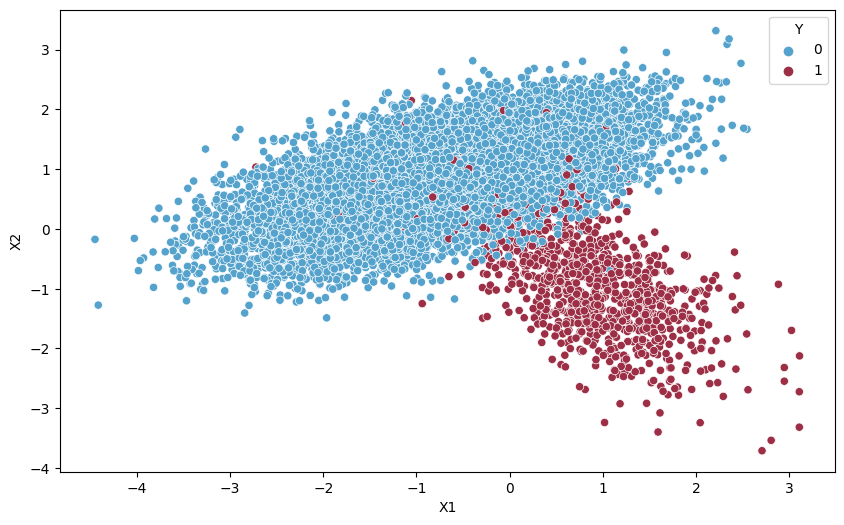

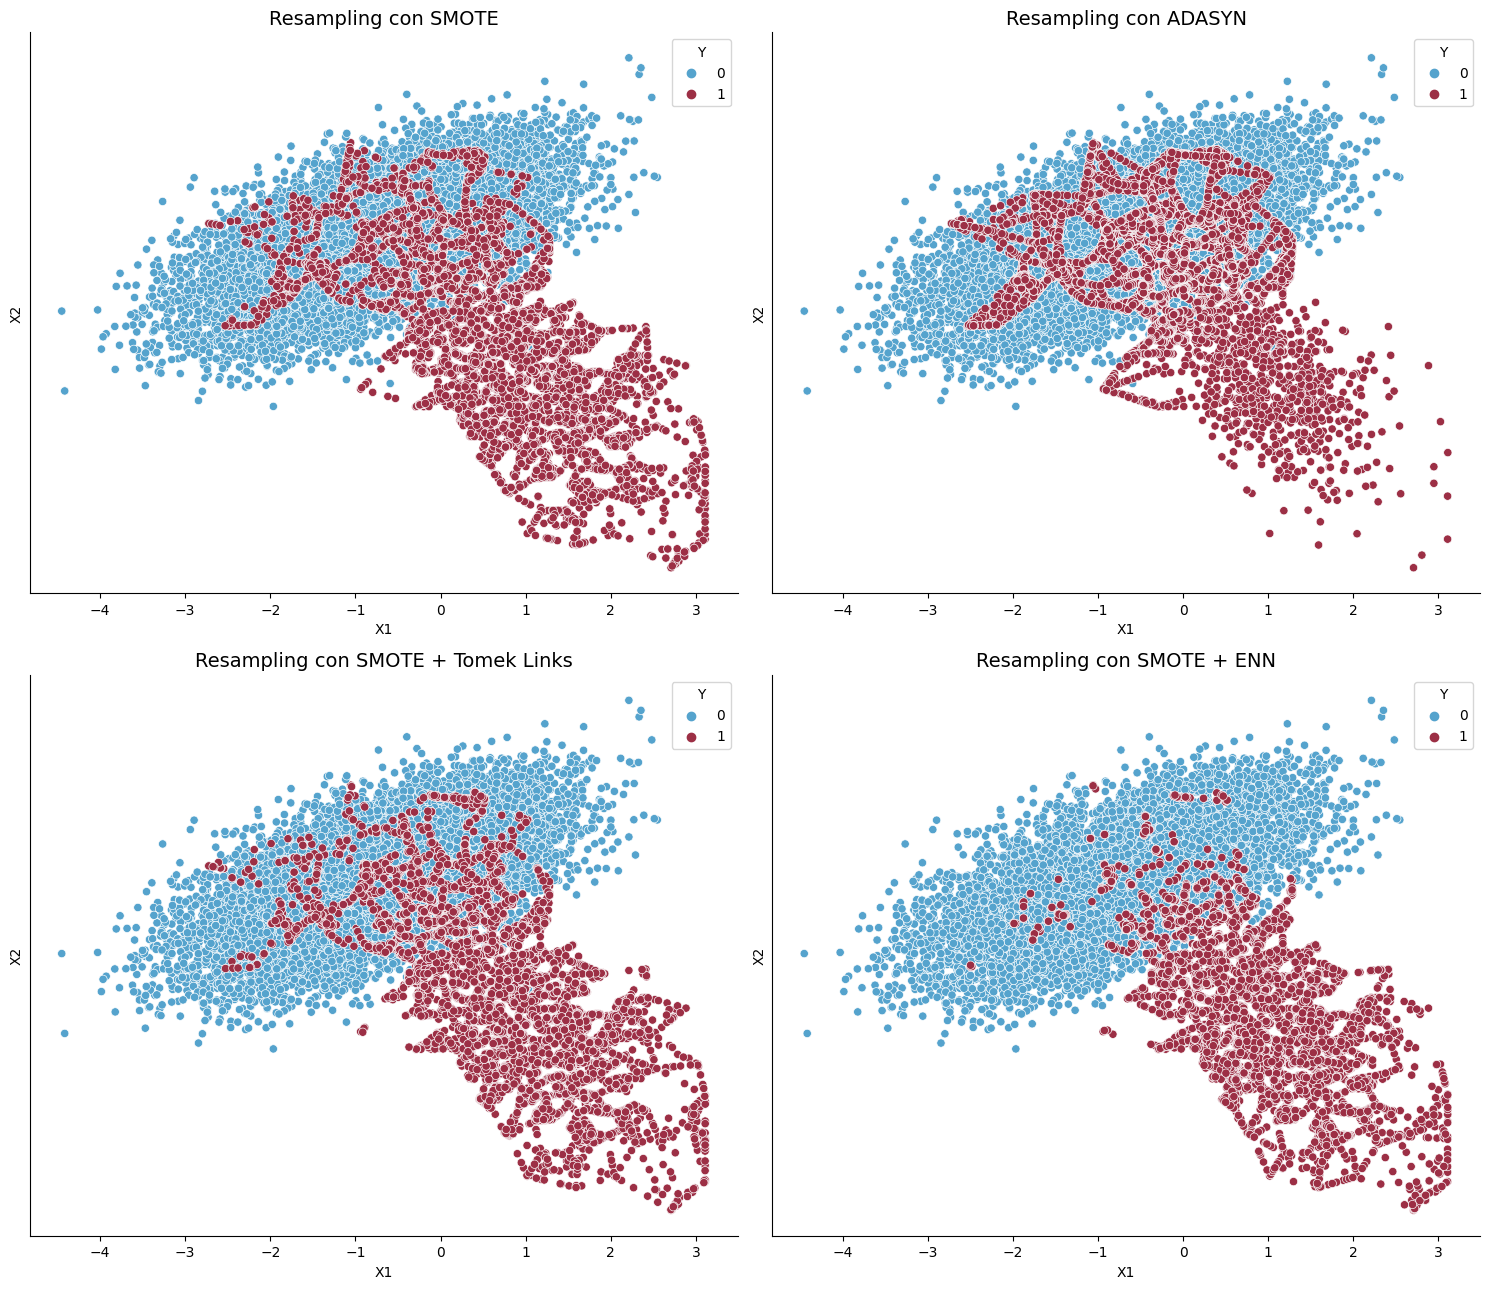

In [17]:
plt.figure(figsize=(10,6),dpi=100)

sns.despine(left=True)
sns.scatterplot(data=df,x='X1', y='X2', hue = 'Y')
plt.show()


#Gráfica de la distribución de las clases 
f, axes = plt.subplots(2,2,figsize=(15, 13), dpi=100)
sns.despine()
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_sm, ax=axes[0,0])
axes[0,0].set_title('Resampling con SMOTE', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_ada, ax=axes[0,1])
axes[0,1].set_title('Resampling con ADASYN', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_smtom, ax=axes[1,0])
axes[1,0].set_title('Resampling con SMOTE + Tomek Links', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_smenn, ax=axes[1,1])
axes[1,1].set_title('Resampling con SMOTE + ENN', fontsize=14)
# sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df, ax=axes[2,0])
# axes[2,0].set_title('Original', fontsize=14)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()